In [55]:
# Install a pip package in the current Jupyter kernel
# https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
#import sys

# try install via pip
#!{sys.executable} -m pip install geopandas
# this is what gave an error when trying to get geopandas
#!{sys.executable} -m pip install fiona

# try install via conda
#!conda install --yes --prefix {sys.prefix} geopandas

In [56]:
## Winter Project

# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import geopandas as gpd
import descartes

In [57]:
# import data from UNICEF
overweight = pd.read_csv("C:\\Users\\Kimberly\\Documents\\GitHub\\WinterProject\\Data\\fusion_GLOBAL_DATAFLOW_UNICEF_1.0_overweight.csv")
display(overweight)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1950,3652.874,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1951,3705.395,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1952,3761.546,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1953,3821.348,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1954,3884.832,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067581,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,SPP_GDPPC: GDP per capita (current US$),_T: Total,2018,29160.10381,NaN,USD: USD,NaN,NaN,...,NaN,NaN,Expressed in Current US Dollars,World Bank Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN
1067582,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,MG_INTNL_MG_CNTRY_DEST: International migrants...,_T: Total,2020,29,3: Thousands,PS: Persons,NaN,NaN,...,NaN,From UNPD: UNMigrantStock2020,NaN,International migrant stock: United Nations De...,NaN,NaN,NaN,NaN,NaN,_T: Total
1067583,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,"MG_RFGS_CNTRY_ASYLM: Refugees, by country of a...",_T: Total,2020,10,1: Tens,PS: Persons,NaN,NaN,...,NaN,From UNHCR: GlobalTrends2020,NaN,Refugees: United Nations High Commissioner for...,NaN,NaN,NaN,NaN,NaN,_T: Total
1067584,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,MG_RFGS_CNTRY_ASYLM_PER1000: Refugees by host ...,_T: Total,2020,0.233198078447834,NaN,PER1000: Per 1000,NaN,NaN,...,NaN,From UNHCR: GlobalTrends2020. National populat...,NaN,Refugees: United Nations High Commissioner for...,NaN,NaN,NaN,NaN,NaN,_T: Total


In [58]:
columns = overweight.columns.values.tolist()
print('There are', len(columns), 'columns named as follows:\n', columns)

There are 22 columns named as follows:
 ['DATAFLOW', 'REF_AREA:Geographic area', 'INDICATOR:Indicator', 'SEX:Sex', 'TIME_PERIOD:Time period', 'OBS_VALUE:Observation Value', 'UNIT_MULTIPLIER:Unit multiplier', 'UNIT_MEASURE:Unit of measure', 'OBS_STATUS:Observation Status', 'OBS_CONF:Observation confidentaility', 'LOWER_BOUND:Lower Bound', 'UPPER_BOUND:Upper Bound', 'WGTD_SAMPL_SIZE:Weighted Sample Size', 'OBS_FOOTNOTE:Observation footnote', 'SERIES_FOOTNOTE:Series footnote', 'DATA_SOURCE:Data Source', 'SOURCE_LINK:Citation of or link to the data source', 'CUSTODIAN:Custodian', 'TIME_PERIOD_METHOD:Time period activity related to when the data are collected', 'REF_PERIOD:Reference Period', 'COVERAGE_TIME:The period of time for which data are provided', 'AGE:Current age']


### Filter the years 1970 forward

In [59]:
overweight['TIME_PERIOD:Time period'].describe()

count     1067586
unique        280
top          2019
freq        34602
Name: TIME_PERIOD:Time period, dtype: object

In [60]:
# convert to datetime type and reduce to year/month
overweight['TIME_PERIOD:Time period'] = pd.to_datetime(overweight['TIME_PERIOD:Time period'])

#extract only year to better align data (some rows had month)
overweight['TIME_PERIOD:Time period'] = overweight['TIME_PERIOD:Time period'].dt.strftime('%Y')

In [61]:
#overweight['TIME_PERIOD:Time period'] = overweight['TIME_PERIOD:Time period'].astype(int)
overweight_filtered = overweight.loc[(overweight['TIME_PERIOD:Time period'] >= '1970')].reset_index(drop=True)
display(overweight_filtered)

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1970,5476.63,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1971,5630.099,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1972,5790.327,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1973,5951.12,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1974,6104.377,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973686,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,SPP_GDPPC: GDP per capita (current US$),_T: Total,2018,29160.10381,NaN,USD: USD,NaN,NaN,...,NaN,NaN,Expressed in Current US Dollars,World Bank Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN
973687,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,MG_INTNL_MG_CNTRY_DEST: International migrants...,_T: Total,2020,29,3: Thousands,PS: Persons,NaN,NaN,...,NaN,From UNPD: UNMigrantStock2020,NaN,International migrant stock: United Nations De...,NaN,NaN,NaN,NaN,NaN,_T: Total
973688,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,"MG_RFGS_CNTRY_ASYLM: Refugees, by country of a...",_T: Total,2020,10,1: Tens,PS: Persons,NaN,NaN,...,NaN,From UNHCR: GlobalTrends2020,NaN,Refugees: United Nations High Commissioner for...,NaN,NaN,NaN,NaN,NaN,_T: Total
973689,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,MG_RFGS_CNTRY_ASYLM_PER1000: Refugees by host ...,_T: Total,2020,0.233198078447834,NaN,PER1000: Per 1000,NaN,NaN,...,NaN,From UNHCR: GlobalTrends2020. National populat...,NaN,Refugees: United Nations High Commissioner for...,NaN,NaN,NaN,NaN,NaN,_T: Total


### Filter out columns that have 20% or more missing values

In [62]:
# filter out the columns with more than 20% na values (threshold is counding non-na values)
nrows = len(overweight_filtered.index)
t = round(nrows * .8)
print('Filtering out columns with', nrows-t, 'NA values (20%) or more out of the', nrows, 'rows total.')
overweight_filtered2 = overweight_filtered.dropna(axis=1, thresh=t)
display(overweight_filtered2)

Filtering out columns with 194738 NA values (20%) or more out of the 973691 rows total.


,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MEASURE:Unit of measure,DATA_SOURCE:Data Source,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1970,5476.63,PS: Persons,UNPD2019,NaN
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1971,5630.099,PS: Persons,UNPD2019,NaN
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1972,5790.327,PS: Persons,UNPD2019,NaN
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1973,5951.12,PS: Persons,UNPD2019,NaN
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1974,6104.377,PS: Persons,UNPD2019,NaN
...,...,...,...,...,...,...,...,...,...
973686,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,SPP_GDPPC: GDP per capita (current US$),_T: Total,2018,29160.10381,USD: USD,World Bank Development Indicators,NaN
973687,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,MG_INTNL_MG_CNTRY_DEST: International migrants...,_T: Total,2020,29,PS: Persons,International migrant stock: United Nations De...,_T: Total
973688,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,"MG_RFGS_CNTRY_ASYLM: Refugees, by country of a...",_T: Total,2020,10,PS: Persons,Refugees: United Nations High Commissioner for...,_T: Total
973689,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,MG_RFGS_CNTRY_ASYLM_PER1000: Refugees by host ...,_T: Total,2020,0.233198078447834,PER1000: Per 1000,Refugees: United Nations High Commissioner for...,_T: Total


In [63]:
cols = overweight_filtered2.columns.values.tolist()
print('There are', len(cols), 'columns remaining named as follows:\n', cols)

There are 9 columns remaining named as follows:
 ['DATAFLOW', 'REF_AREA:Geographic area', 'INDICATOR:Indicator', 'SEX:Sex', 'TIME_PERIOD:Time period', 'OBS_VALUE:Observation Value', 'UNIT_MEASURE:Unit of measure', 'DATA_SOURCE:Data Source', 'AGE:Current age']


In [64]:
def refine_name(n):
    pattern = re.compile(r'.*:(.*)')
    title = re.findall(pattern, n)
#    print('title', title)
    if not title: #len(title) <=1:
        title = [n]
    return title[0]

new_col_names = {}
for c in cols:
#    print('working on column', c)
    new_c = refine_name(c)
#    print('column name refined to', new_c)
    new_col_names[c] = new_c
print('Simplifying the column names as defined:\n', new_col_names)

Simplifying the column names as defined:
 {'DATAFLOW': 'DATAFLOW', 'REF_AREA:Geographic area': 'Geographic area', 'INDICATOR:Indicator': 'Indicator', 'SEX:Sex': 'Sex', 'TIME_PERIOD:Time period': 'Time period', 'OBS_VALUE:Observation Value': 'Observation Value', 'UNIT_MEASURE:Unit of measure': 'Unit of measure', 'DATA_SOURCE:Data Source': 'Data Source', 'AGE:Current age': 'Current age'}


In [65]:
overweight_filtered2.rename(columns=new_col_names, inplace=True)
display(overweight_filtered2)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,DATAFLOW,Geographic area,Indicator,Sex,Time period,Observation Value,Unit of measure,Data Source,Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1970,5476.63,PS: Persons,UNPD2019,NaN
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1971,5630.099,PS: Persons,UNPD2019,NaN
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1972,5790.327,PS: Persons,UNPD2019,NaN
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1973,5951.12,PS: Persons,UNPD2019,NaN
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1974,6104.377,PS: Persons,UNPD2019,NaN
...,...,...,...,...,...,...,...,...,...
973686,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,SPP_GDPPC: GDP per capita (current US$),_T: Total,2018,29160.10381,USD: USD,World Bank Development Indicators,NaN
973687,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,MG_INTNL_MG_CNTRY_DEST: International migrants...,_T: Total,2020,29,PS: Persons,International migrant stock: United Nations De...,_T: Total
973688,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,"MG_RFGS_CNTRY_ASYLM: Refugees, by country of a...",_T: Total,2020,10,PS: Persons,Refugees: United Nations High Commissioner for...,_T: Total
973689,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,MG_RFGS_CNTRY_ASYLM_PER1000: Refugees by host ...,_T: Total,2020,0.233198078447834,PER1000: Per 1000,Refugees: United Nations High Commissioner for...,_T: Total


### Filter out the geographical regions and leave only data associated with individual countries

In [66]:
countries = overweight_filtered2['Geographic area'].unique()
print('Starting with a list of', len(countries), 'country names.')

Starting with a list of 332 country names.


In [67]:
# if there is an underscore in the geographic area value then it is a region and not a country
def refine_countries(x):
    pattern = re.compile(r'.*_.*')
    region = re.findall(pattern, x)
    if not region:
        return x
    else:
        return 'NaN'

refined_countries = []   
for c in countries:
    c2 = refine_countries(c)
    if c2 != 'NaN':
        refined_countries.append(c2)
print('After removing region names, we are left with', len(refined_countries), 'unique country names.')

After removing region names, we are left with 236 unique country names.


In [68]:
overweight_filtered3 = overweight_filtered2[overweight_filtered2['Geographic area'].isin(refined_countries)]
overweight_filtered3.drop('DATAFLOW', axis=1, inplace=True)
overweight_filtered3.reset_index(inplace=True, drop=True)
display(overweight_filtered3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Geographic area,Indicator,Sex,Time period,Observation Value,Unit of measure,Data Source,Current age
0,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1970,5476.63,PS: Persons,UNPD2019,NaN
1,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1971,5630.099,PS: Persons,UNPD2019,NaN
2,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1972,5790.327,PS: Persons,UNPD2019,NaN
3,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1973,5951.12,PS: Persons,UNPD2019,NaN
4,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1974,6104.377,PS: Persons,UNPD2019,NaN
...,...,...,...,...,...,...,...,...
878523,SXM: Sint Maarten,SPP_GDPPC: GDP per capita (current US$),_T: Total,2018,29160.10381,USD: USD,World Bank Development Indicators,NaN
878524,SXM: Sint Maarten,MG_INTNL_MG_CNTRY_DEST: International migrants...,_T: Total,2020,29,PS: Persons,International migrant stock: United Nations De...,_T: Total
878525,SXM: Sint Maarten,"MG_RFGS_CNTRY_ASYLM: Refugees, by country of a...",_T: Total,2020,10,PS: Persons,Refugees: United Nations High Commissioner for...,_T: Total
878526,SXM: Sint Maarten,MG_RFGS_CNTRY_ASYLM_PER1000: Refugees by host ...,_T: Total,2020,0.233198078447834,PER1000: Per 1000,Refugees: United Nations High Commissioner for...,_T: Total


### Split the "Geographic area" column into country and ISO code (alpha-3)

In [69]:
country_split = overweight_filtered3['Geographic area'].str.split(': ', n=1, expand=True)
#display(country_split)
overweight_filtered3['COUNTRYAFF'] = country_split[1]
overweight_filtered3['ISO-3'] = country_split[0]
overweight_filtered4 = overweight_filtered3.drop(columns=['Geographic area'])
display(overweight_filtered4)

<ipython-input-69-deb89efc33bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overweight_filtered3['COUNTRYAFF'] = country_split[1]
<ipython-input-69-deb89efc33bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overweight_filtered3['ISO-3'] = country_split[0]


,Indicator,Sex,Time period,Observation Value,Unit of measure,Data Source,Current age,COUNTRYAFF,ISO-3
0,DM_POP_TOT: Total population,F: Female,1970,5476.63,PS: Persons,UNPD2019,NaN,Afghanistan,AFG
1,DM_POP_TOT: Total population,F: Female,1971,5630.099,PS: Persons,UNPD2019,NaN,Afghanistan,AFG
2,DM_POP_TOT: Total population,F: Female,1972,5790.327,PS: Persons,UNPD2019,NaN,Afghanistan,AFG
3,DM_POP_TOT: Total population,F: Female,1973,5951.12,PS: Persons,UNPD2019,NaN,Afghanistan,AFG
4,DM_POP_TOT: Total population,F: Female,1974,6104.377,PS: Persons,UNPD2019,NaN,Afghanistan,AFG
...,...,...,...,...,...,...,...,...,...
878523,SPP_GDPPC: GDP per capita (current US$),_T: Total,2018,29160.10381,USD: USD,World Bank Development Indicators,NaN,Sint Maarten,SXM
878524,MG_INTNL_MG_CNTRY_DEST: International migrants...,_T: Total,2020,29,PS: Persons,International migrant stock: United Nations De...,_T: Total,Sint Maarten,SXM
878525,"MG_RFGS_CNTRY_ASYLM: Refugees, by country of a...",_T: Total,2020,10,PS: Persons,Refugees: United Nations High Commissioner for...,_T: Total,Sint Maarten,SXM
878526,MG_RFGS_CNTRY_ASYLM_PER1000: Refugees by host ...,_T: Total,2020,0.233198078447834,PER1000: Per 1000,Refugees: United Nations High Commissioner for...,_T: Total,Sint Maarten,SXM


### Filter the "Current age" to include only children under age 5

In [70]:
ages = overweight_filtered4['Current age'].unique()
print(ages)
# I think we want to leave only the value 'Y0T4: Under 5 years old'
overweight_filtered5 = overweight_filtered4[overweight_filtered4['Current age'].isin(['Y0T4: Under 5 years old'])]
overweight_filtered5.reset_index(inplace=True, drop=True)
display(overweight_filtered5)

[nan '_T: Total' 'Y15T19: 15 to 19 years old' 'Y15T49: 15 to 49 years old'
 'Y11T17: 11 to 17 years old' 'Y0T4: Under 5 years old'
 'Y20T24: 20 to 24 years old' 'M36T59: 36 to 59 months old'
 'Y5T17: 5 to 17 years old' 'Y13T15: 13 to 15 years'
 'Y10T14: 10 to 14 years old' 'Y15T24: 15 to 24 years old'
 'M12T15: 12 to 15 months old' 'M12T23: 12 to 23 months old'
 'M20T23: 20 to 23 months old' 'M0T23: Under 24 months old'
 'M0T5: Under 6 months old' 'M6T23: 6 to 23 months old'
 'Y0: Under 1 year old' 'M6T59: 6 to 59 months old'
 'Y15T17: 15 to 17 years old' 'Y18T29: 18 to 29 years old'
 'Y10T19: 10 to 19 years old' 'Y5T14: 5 to 14 years old'
 'Y0T14: Under 15 years old' 'Y3T5: 3 to 5 years old'
 'Y4T6: 4 to 6 years old' 'M24T59: 24 to 59 months old'
 'Y7T17: 7 to 17 years old' 'M0T47: Under 48 months old'
 'Y6T17: 6 to 17 years old' 'Y10T17: 10 to 17 years old'
 'M36T47: 36 to 47 months old' 'Y3T6: 3 to 6 years old']


,Indicator,Sex,Time period,Observation Value,Unit of measure,Data Source,Current age,COUNTRYAFF,ISO-3
0,NT_ANT_BAZ_AVG: Mean BMI-for-age,F: Female,2004,-0.1,NUMBER: Number,Summary report of the national nutrition surve...,Y0T4: Under 5 years old,Afghanistan,AFG
1,NT_ANT_BAZ_AVG: Mean BMI-for-age,F: Female,2013,-0.1,NUMBER: Number,Afghanistan National Nutrition Survey 2013,Y0T4: Under 5 years old,Afghanistan,AFG
2,NT_ANT_BAZ_AVG: Mean BMI-for-age,F: Female,2018,0.1,NUMBER: Number,Afghanistan Health Survey 2018,Y0T4: Under 5 years old,Afghanistan,AFG
3,NT_ANT_BAZ_NE2: BMI-for-age <-2 SD,F: Female,2004,8.1,PCNT: %,Summary report of the national nutrition surve...,Y0T4: Under 5 years old,Afghanistan,AFG
4,NT_ANT_BAZ_NE2: BMI-for-age <-2 SD,F: Female,2013,8.3,PCNT: %,Afghanistan National Nutrition Survey 2013,Y0T4: Under 5 years old,Afghanistan,AFG
...,...,...,...,...,...,...,...,...,...
88448,MNCH_ORSZINC: Diarrhoea treatment - percentage...,_T: Total,2015,15.1,PCNT: %,Demographic and Health Survey 2015,Y0T4: Under 5 years old,Zimbabwe,ZWE
88449,MNCH_ORSZINC: Diarrhoea treatment - percentage...,_T: Total,2019,22.5,PCNT: %,Multiple Indicator Cluster Survey 2019,Y0T4: Under 5 years old,Zimbabwe,ZWE
88450,ECD_CHLD_U5_BKS-HM: Percentage of children und...,_T: Total,2019,3.2,PCNT: %,MICS 2019,Y0T4: Under 5 years old,Zimbabwe,ZWE
88451,ECD_CHLD_U5_LFT-ALN: Percentage of children un...,_T: Total,2019,20.4,PCNT: %,MICS 2019,Y0T4: Under 5 years old,Zimbabwe,ZWE


### Filter for overweight indicators

In [28]:
### THIS SECTION DOESN'T WORK YET ###

In [17]:
def overweight_indicator(o):
    pattern = re.compile(r'.*verweight.*')
    owi = re.findall(pattern, o)
    if not owi:
        return None
    else:
        return owi[0]

inds = overweight_filtered3['Indicator'].unique()
print(len(inds))

refined_inds = []
for i in inds:
    owi = overweight_indicator(i)
    print('filtering', i, 'to', owi)
    if owi != None:
        refined_inds.append(owi)
print(len(refined_inds)) 
print(refined_inds)
overweight_filtered6 = overweight_filtered5[overweight_filtered5['Indicator'].isin([refined_inds])]
overweight_filtered6.reset_index(inplace=True, drop=True)
display(overweight_filtered5)

364
filtering DM_POP_TOT: Total population to None
filtering CME_MRY0: Infant mortality rate to None
filtering CME_MRY0T4: Under-five mortality rate to None
filtering CME_MRY1T4: Child mortality rate (aged 1-4 years) to None
filtering CME_TMY0: Infant deaths to None
filtering CME_TMY0T4: Under-five deaths to None
filtering CME_TMY1T4: Child deaths (aged 1-4 years) to None
filtering HVA_EPI_DTH_ANN_0-19: Estimated number of annual AIDS-related deaths (children aged 0-19 years) to None
filtering HVA_EPI_DTH_ANN_15-24: Estimated number of annual AIDS-related deaths (adolescents and young people aged 15-24 years) to None
filtering HVA_EPI_DTH_RT_0-14: Estimated rate of annual AIDS-related deaths (per 100,000 population, children aged 0-14 years) to None
filtering HVA_EPI_DTH_RT_10-19: Estimated rate of annual AIDS-related deaths (per 100,000 population, adolescents aged 10-19 years) to None
filtering HVA_EPI_INF_ANN_0-19: Estimated number of new HIV infections (children aged 0-19 years) to

filtering IM_HEPB3: Percentage of surviving infants who received the third dose of hep B-containing vaccine to None
filtering IM_HIB3: Percentage of surviving infants who received the third dose of Hib-containing vaccine to None
filtering HVA_PMTCT_ART_CVG: Per cent of pregnant women living with HIV receiving lifelong ART to None
filtering HVA_PMTCT_ART_NUM: Reported number of pregnant women living with HIV receiving lifelong antiretroviral treatment (ART) to None
filtering HVA_PMTCT_ARV_CVG: Per cent of pregnant women living with HIV receiving effective ARVs for PMTCT (excludes single-dose nevirapine) to None
filtering HVA_PMTCT_ARV_NUM: Reported number of pregnant woment living with HIV receiving anitretroviral treatments (ARVs) for prevention of mother to child transmission programmes (PMTCT) to None
filtering MNCH_CSEC: C-section rate - percentage of deliveries by cesarean section to None
filtering PT_ADLT_PS_NEC: Percentage of adults who think that physical punishment is necessary

,Indicator,Sex,Time period,Observation Value,Unit of measure,Data Source,Current age,COUNTRY,ISO
0,NT_ANT_BAZ_AVG: Mean BMI-for-age,F: Female,2004,-0.1,NUMBER: Number,Summary report of the national nutrition surve...,Y0T4: Under 5 years old,AFG,Afghanistan
1,NT_ANT_BAZ_AVG: Mean BMI-for-age,F: Female,2013,-0.1,NUMBER: Number,Afghanistan National Nutrition Survey 2013,Y0T4: Under 5 years old,AFG,Afghanistan
2,NT_ANT_BAZ_AVG: Mean BMI-for-age,F: Female,2018,0.1,NUMBER: Number,Afghanistan Health Survey 2018,Y0T4: Under 5 years old,AFG,Afghanistan
3,NT_ANT_BAZ_NE2: BMI-for-age <-2 SD,F: Female,2004,8.1,PCNT: %,Summary report of the national nutrition surve...,Y0T4: Under 5 years old,AFG,Afghanistan
4,NT_ANT_BAZ_NE2: BMI-for-age <-2 SD,F: Female,2013,8.3,PCNT: %,Afghanistan National Nutrition Survey 2013,Y0T4: Under 5 years old,AFG,Afghanistan
...,...,...,...,...,...,...,...,...,...
88448,MNCH_ORSZINC: Diarrhoea treatment - percentage...,_T: Total,2015,15.1,PCNT: %,Demographic and Health Survey 2015,Y0T4: Under 5 years old,ZWE,Zimbabwe
88449,MNCH_ORSZINC: Diarrhoea treatment - percentage...,_T: Total,2019,22.5,PCNT: %,Multiple Indicator Cluster Survey 2019,Y0T4: Under 5 years old,ZWE,Zimbabwe
88450,ECD_CHLD_U5_BKS-HM: Percentage of children und...,_T: Total,2019,3.2,PCNT: %,MICS 2019,Y0T4: Under 5 years old,ZWE,Zimbabwe
88451,ECD_CHLD_U5_LFT-ALN: Percentage of children un...,_T: Total,2019,20.4,PCNT: %,MICS 2019,Y0T4: Under 5 years old,ZWE,Zimbabwe


# MAP THE DATA

In [18]:
## AFTER CLEANING THE DATA, MAKE HEATMAP ON MAP
# heatmap to map graphic
# written tutorial: https://towardsdatascience.com/making-heat-maps-with-literal-maps-how-to-use-python-to-construct-a-chloropleth-6b65e4e33905
# video tutorial:   https://www.youtube.com/watch?v=t7lliJXFt8w&t=217s
# select color:     https://matplotlib.org/2.0.2/users/colormaps.html

In [19]:
# import map
# https://hub.arcgis.com/datasets/esri::world-countries-generalized/about
world_map = gpd.read_file("C:\\Users\\Kimberly\\Documents\\GitHub\\WinterProject\\Data\\World_Countries__Generalized_.shp")

<AxesSubplot:>

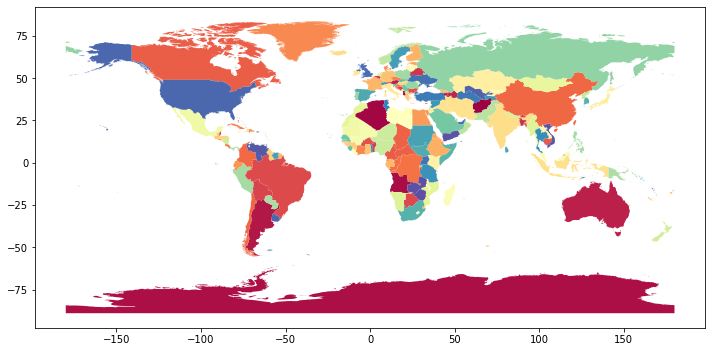

In [79]:
world_map.plot(cmap = 'Spectral', figsize = (12,8), column='COUNTRYAFF')

In [22]:
display(world_map)

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,2,United States Minor Outlying Islands,UM,United States,US,0.480216,0.003216,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281..."
2,3,Cook Islands,CK,New Zealand,NZ,0.980664,0.013073,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."
3,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258..."
4,5,Niue,NU,New Zealand,NZ,0.541413,0.021414,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."
...,...,...,...,...,...,...,...,...
244,245,Northern Mariana Islands,MP,United States,US,0.908853,0.019927,"MULTIPOLYGON (((145.73468 15.08722, 145.72830 ..."
245,246,Palau,PW,Palau,PW,1.105323,0.031136,"MULTIPOLYGON (((134.53137 7.35444, 134.52234 7..."
246,247,Russian Federation,RU,Russian Federation,RU,1536.287150,2931.526082,"MULTIPOLYGON (((-179.99999 68.98010, -179.9580..."
247,248,Spain,ES,Spain,ES,51.724956,52.915449,"MULTIPOLYGON (((-2.91472 35.27361, -2.93924 35..."


In [72]:
# merge the map with the overweight children data
overweight_map = world_map.merge(overweight_filtered5, on='COUNTRYAFF')
display(overweight_map)

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,Indicator,Sex,Time period,Observation Value,Unit of measure,Data Source,Current age,ISO-3
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14...",NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),F: Female,1991,3.1,PCNT: %,Third national health and nutrition examinatio...,Y0T4: Under 5 years old,USA
1,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14...",NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),F: Female,2000,2.6,PCNT: %,United States National Health and Nutrition Ex...,Y0T4: Under 5 years old,USA
2,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14...",NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),F: Female,2002,2.0,PCNT: %,United States National Health and Nutrition Ex...,Y0T4: Under 5 years old,USA
3,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14...",NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),F: Female,2004,2.8,PCNT: %,National Health and Nutrition Examination Surv...,Y0T4: Under 5 years old,USA
4,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14...",NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),F: Female,2006,1.5,PCNT: %,National Health and Nutrition Examination Surv...,Y0T4: Under 5 years old,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84101,243,Marshall Islands,MH,Marshall Islands,MH,0.683479,0.002845,"MULTIPOLYGON (((168.78637 7.28889, 168.76721 7...",NT_ANT_WHZ_PO1: Weight-for-height >+1 SD,_T: Total,2017,21.0,PCNT: %,Republic of the Marshall Islands Integrated Ch...,Y0T4: Under 5 years old,MHL
84102,243,Marshall Islands,MH,Marshall Islands,MH,0.683479,0.002845,"MULTIPOLYGON (((168.78637 7.28889, 168.76721 7...",NT_ANT_WHZ_PO2: Weight-for-height >+2 SD (over...,_T: Total,2017,4.1,PCNT: %,Republic of the Marshall Islands Integrated Ch...,Y0T4: Under 5 years old,MHL
84103,243,Marshall Islands,MH,Marshall Islands,MH,0.683479,0.002845,"MULTIPOLYGON (((168.78637 7.28889, 168.76721 7...",NT_ANT_WHZ_PO2_ONLY: Weight-for-height >+2SD b...,_T: Total,2017,2.4,PCNT: %,Republic of the Marshall Islands Integrated Ch...,Y0T4: Under 5 years old,MHL
84104,243,Marshall Islands,MH,Marshall Islands,MH,0.683479,0.002845,"MULTIPOLYGON (((168.78637 7.28889, 168.76721 7...",NT_ANT_WHZ_PO3: Weight-for-height >+3 SD,_T: Total,2017,1.2,PCNT: %,Republic of the Marshall Islands Integrated Ch...,Y0T4: Under 5 years old,MHL


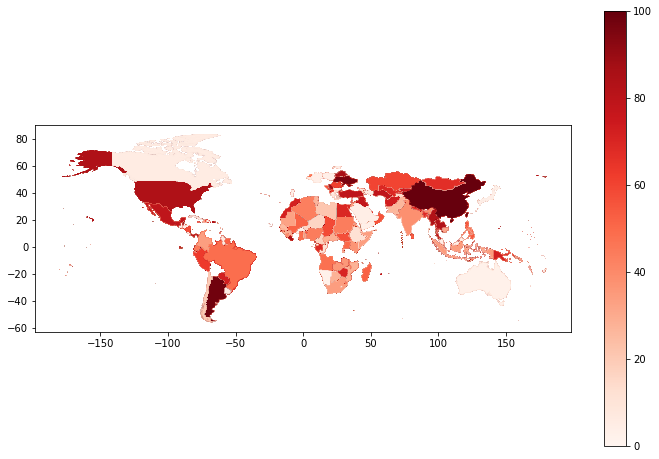

In [83]:
fig, ax = plt.subplots(1, figsize = (12,8))
overweight_map.plot(column='Observation Value', cmap='Reds', ax=ax)
bar_info = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=100))
bar_info._A = []
cbar = fig.colorbar(bar_info)

In [77]:
overweight_filtered5['Observation Value'].max()

'99.8'